C:\Users\Anshu\AppData\Local\Temp\ipykernel_10796\1861899044.py:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


Category
Set              5919897.0
Western Dress    3318232.0
kurta            2891562.0
Top               721354.0
Ethnic Dress      102085.0
Name: Amount, dtype: float64
Average transaction amount: 689.5052320050735
Percentage of cancelled orders: 0.0


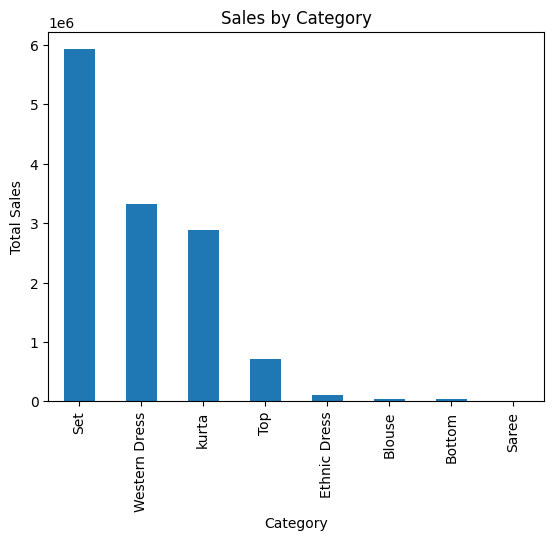

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the CSV data
df = pd.read_csv('Amazon Sale Report.csv')

# Preprocess data
df['Date'] = pd.to_datetime(df['Date']) # Convert date to datetime
df['Amount'] = df['Amount'].astype(float) # Convert amount to float

# Data cleaning
df = df.dropna() # Drop rows with missing values
df = df[df['Amount'] > 0] # Remove rows with 0 or negative amounts

# Visualization

# Plot sales by date
df.groupby(df['Date'].dt.date)['Amount'].sum().plot()
plt.ylabel('Total Sales')
plt.title('Sales by Date')

# Plot sales by category
df.groupby('Category')['Amount'].sum().sort_values(ascending=False).plot.bar()
plt.ylabel('Total Sales')
plt.title('Sales by Category')

# Data analysis

# Top selling categories
print(df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)) 

# Average transaction amount
print('Average transaction amount:', df['Amount'].mean())

# Percentage of cancelled orders
cancelled = df[df['Status'] == 'Cancelled']
print('Percentage of cancelled orders:', len(cancelled)/len(df)*100)

In [2]:
state_sales = df.groupby('ship-state')['Amount'].sum()
state_sales.plot.bar()
plt.title('Total Sales by State')
plt.ylabel('Sales Amount')

KeyError: 'ship-state'

In [3]:
product_sales = df.groupby('SKU')['Amount'].sum()
product_sales.sort_values(ascending=False).head(10).plot.bar()
plt.title('Top 10 Best Selling Products')
plt.ylabel('Total Sales')

KeyError: 'SKU'

In [4]:
promo_sales = df[df['promotion-ids'].notnull()].groupby('promotion-ids')['Amount'].sum()
promo_sales.plot.pie(autopct='%0.2f%%') 
plt.title('Sales Percentage by Promotion')

KeyError: 'promotion-ids'

In [5]:
df.set_index('Date')['Amount'].resample('M').sum().plot()
plt.title('Monthly Sales Over Time')
plt.ylabel('Total Sales')

KeyError: "None of ['Date'] are in the columns"